In [38]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
bl = pd.read_excel('bplm.xlsx')
bl.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bl.columns = bl.columns.str.lower()
bl.columns = bl.columns.str.replace(' ','_')

In [4]:
bl['zip_code'] = bl['zip_code'].astype(str)
bl['id'] = bl['id'].astype(str)

In [6]:
bl1 = bl.loc[bl['personal_loan']==1]
bl0 = bl.loc[bl['personal_loan']==0]

bl1_samp = bl1.sample(400)
bl0_samp = bl0.sample(400)

bldfc = pd.concat([bl1_samp, bl0_samp])
bldfc['personal_loan'].value_counts()

0    400
1    400
Name: personal_loan, dtype: int64

In [7]:
bl_unseen = bldfc.sample(frac=0.20)

bl_train = bldfc.sample(frac=0.80)

In [8]:
bl_train.shape

(640, 14)

In [9]:
bl_train.columns

Index(['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

In [10]:
target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X = bl_train[feature_cols]
y = bl_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Logistic Regression Model

lg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model.fit(X_train, y_train)
lg_model_score = cross_val_score(lg_model, X, y, cv=5)

In [20]:
print('accuracy_train = {:7.4f}'.format(lg_model.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(lg_model.score(X_test, y_test)))
print('cross validatio score = {:7.4f}'.format(lg_model_score.mean()))

accuracy_train =  0.8281
accuracy_test =  0.8516
cross validatio score =  0.8438


Accuracy is:  0.8515625
              precision    recall  f1-score   support

           0       0.79      0.89      0.83        54
           1       0.91      0.82      0.87        74

    accuracy                           0.85       128
   macro avg       0.85      0.86      0.85       128
weighted avg       0.86      0.85      0.85       128



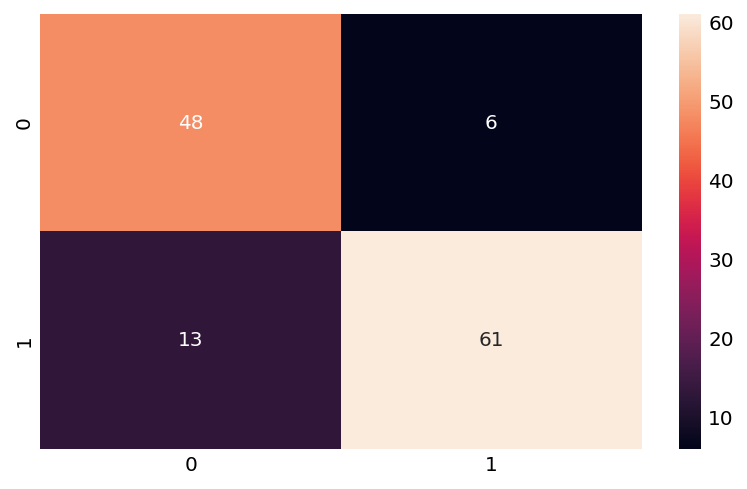

In [21]:
#Calculate the predicted labels and predicted probabilities on the test set
y_pred = lg_model.predict(X_test)

y_pp = lg_model.predict_proba(X_test)

#Create the confusion matrix
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))

In [24]:
#Reduced features
target_col1 = 'personal_loan'
feature_cols1 = ['income', 'family', 'education', 'ccavg', 'mortgage',
       'cd_account', 'online']
X1 = bl_train[feature_cols1]
y1 = bl_train[target_col1]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

lg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model.fit(X1_train, y1_train)
lg_model_score1 = cross_val_score(lg_model, X1, y1, cv=5)

print('accuracy_train = {:7.4f}'.format(lg_model.score(X1_train, y1_train)))
print('accuracy_test = {:7.4f}'.format(lg_model.score(X1_test, y1_test)))
print('cross_val_score: ', lg_model_score1.mean())

accuracy_train =  0.8848
accuracy_test =  0.8750
cross_val_score:  0.875


Accuracy is:  0.875
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        54
           1       0.88      0.91      0.89        74

    accuracy                           0.88       128
   macro avg       0.87      0.87      0.87       128
weighted avg       0.87      0.88      0.87       128



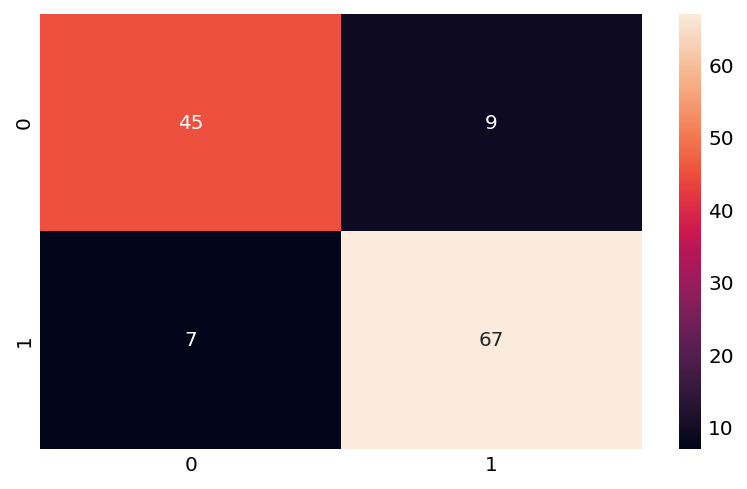

In [25]:
#Calculate the predicted labels and predicted probabilities on the test set
y1_pred = lg_model.predict(X1_test)

y1_pp = lg_model.predict_proba(X1_test)

#Create the confusion matrix
ac = accuracy_score(y1_test, y1_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y1_test, y1_pred))

In [45]:
#Support Vector Machine
#using all features

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X = bl_train[feature_cols]
y = bl_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', probability=True, max_iter=1000)
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)
svm_model_score = cross_val_score(svm_model, X, y, cv=5)

print('accuracy_train = {:7.4f}'.format(svm_model.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(svm_model.score(X_test, y_test)))
print('cross_val_score: ', svm_model_score.mean())

accuracy_train =  0.6035
accuracy_test =  0.5625
cross_val_score:  0.6921875


Accuracy is:  0.5625
              precision    recall  f1-score   support

           0       0.49      0.69      0.57        54
           1       0.67      0.47      0.56        74

    accuracy                           0.56       128
   macro avg       0.58      0.58      0.56       128
weighted avg       0.59      0.56      0.56       128



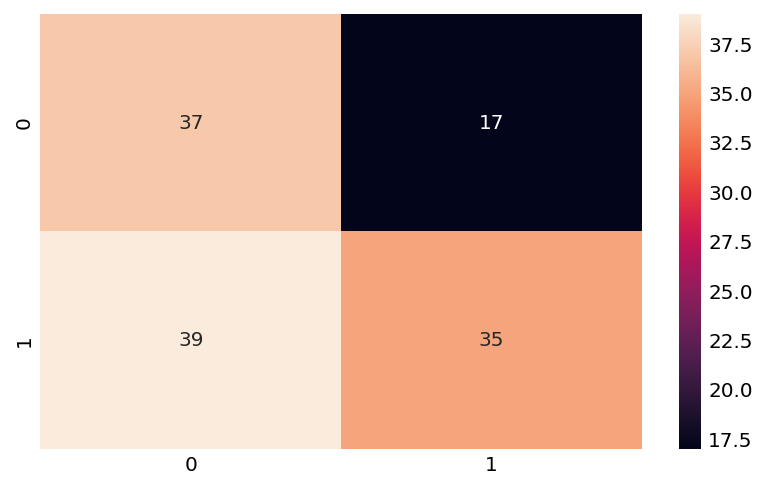

In [46]:
#Calculate the predicted labels and predicted probabilities on the test set
y_pred = svm_model.predict(X_test)

y_pp = svm_model.predict_proba(X_test)

#Create the confusion matrix
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))

In [47]:
#Support Vector Machine
#Reduced features

target_col1 = 'personal_loan'
feature_cols1 = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']
X1 = bl_train[feature_cols1]
y1 = bl_train[target_col1]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', probability=True, max_iter=1000)
svm_model.fit(X1_train, y1_train)
svm_model.score(X1_test, y1_test)
svm_model_score = cross_val_score(svm_model, X1, y1, cv=5)

print('accuracy_train = {:7.4f}'.format(svm_model.score(X1_train, y1_train)))
print('accuracy_test = {:7.4f}'.format(svm_model.score(X1_test, y1_test)))
print('cross_val_score: ', svm_model_score.mean())

accuracy_train =  0.4883
accuracy_test =  0.5078
cross_val_score:  0.6390625


Accuracy is:  0.5078125
              precision    recall  f1-score   support

           0       0.40      0.31      0.35        54
           1       0.56      0.65      0.60        74

    accuracy                           0.51       128
   macro avg       0.48      0.48      0.48       128
weighted avg       0.49      0.51      0.50       128



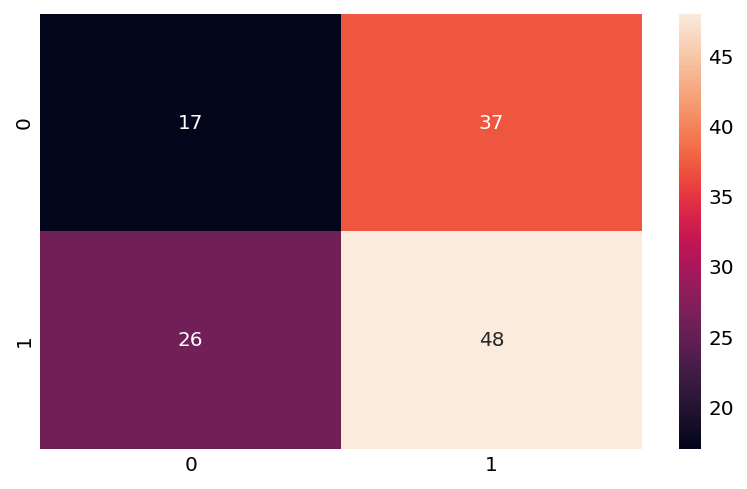

In [48]:
#Calculate the predicted labels and predicted probabilities on the test set
y1_pred = svm_model.predict(X1_test)

y1_pp = svm_model.predict_proba(X1_test)

#Create the confusion matrix
ac = accuracy_score(y1_test, y1_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y1_test, y1_pred))

In [34]:
#Naive Bayes
#using all features

target_col = 'personal_loan'
feature_cols = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X = bl_train[feature_cols]
y = bl_train[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model.score(X_test, y_test)
nb_model_score = cross_val_score(nb_model, X, y, cv=5)

print('accuracy_train = {:7.4f}'.format(nb_model.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(nb_model.score(X_test, y_test)))
print('cross_val_score: ', nb_model_score.mean())

accuracy_train =  0.8008
accuracy_test =  0.7969
cross_val_score:  0.8046875


Accuracy is:  0.796875
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        54
           1       0.91      0.72      0.80        74

    accuracy                           0.80       128
   macro avg       0.81      0.81      0.80       128
weighted avg       0.82      0.80      0.80       128



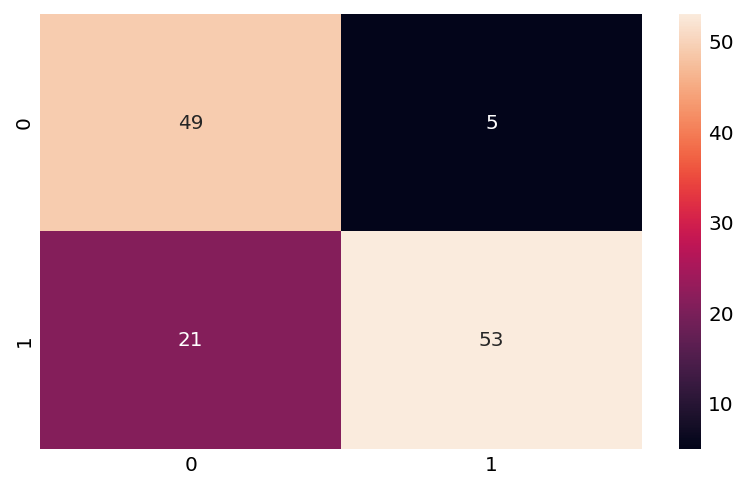

In [35]:
#Calculate the predicted labels and predicted probabilities on the test set
y_pred = nb_model.predict(X_test)

y_pp = nb_model.predict_proba(X_test)

#Create the confusion matrix
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))

In [36]:
#Naive Bayes
#Reduced features

target_col1 = 'personal_loan'
feature_cols1 = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']
X1 = bl_train[feature_cols1]
y1 = bl_train[target_col1]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X1_train, y1_train)
nb_model.score(X1_test, y1_test)
nb_model_score = cross_val_score(nb_model, X1, y1, cv=5)

print('accuracy_train = {:7.4f}'.format(nb_model.score(X1_train, y1_train)))
print('accuracy_test = {:7.4f}'.format(nb_model.score(X1_test, y1_test)))
print('cross_val_score: ', nb_model_score.mean())

accuracy_train =  0.8125
accuracy_test =  0.7969
cross_val_score:  0.8109375


Accuracy is:  0.5078125
              precision    recall  f1-score   support

           0       0.40      0.31      0.35        54
           1       0.56      0.65      0.60        74

    accuracy                           0.51       128
   macro avg       0.48      0.48      0.48       128
weighted avg       0.49      0.51      0.50       128



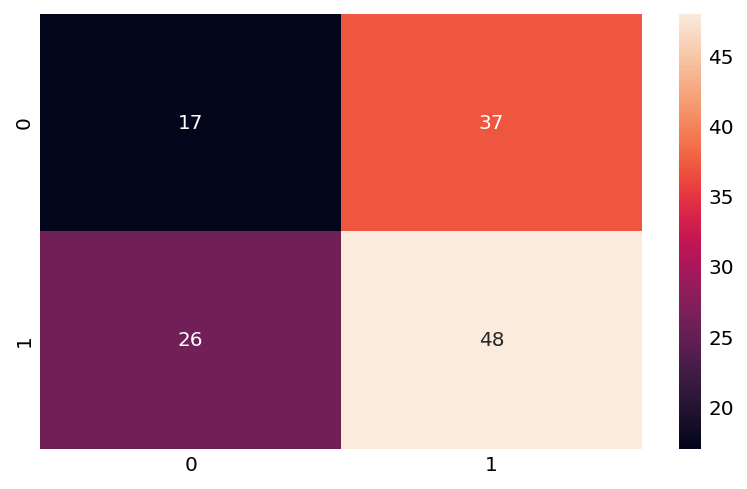

In [37]:
#Calculate the predicted labels and predicted probabilities on the test set
y_pred = nb_model.predict(X1_test)

y_pp = nb_model.predict_proba(X1_test)

#Create the confusion matrix
ac = accuracy_score(y1_test, y1_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y1_test, y1_pred))

In [39]:
##We'll test these 3 models on unseen dataset

target_col_unseen = 'personal_loan'
feature_cols_unseen = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']
X_unseen = bl_unseen[feature_cols_unseen]
y_unseen = bl_unseen[target_col_unseen]

target_col1_unseen = 'personal_loan'
feature_cols1_unseen = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']
X1_unseen = bl_unseen[feature_cols1_unseen]
y1_unseen = bl_unseen[target_col1_unseen]


accuracy_unseen =  0.8625
cross_val_score_unseen =  0.8500
Accuracy score is:  0.8625
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.84      0.88      0.86        78

    accuracy                           0.86       160
   macro avg       0.86      0.86      0.86       160
weighted avg       0.86      0.86      0.86       160



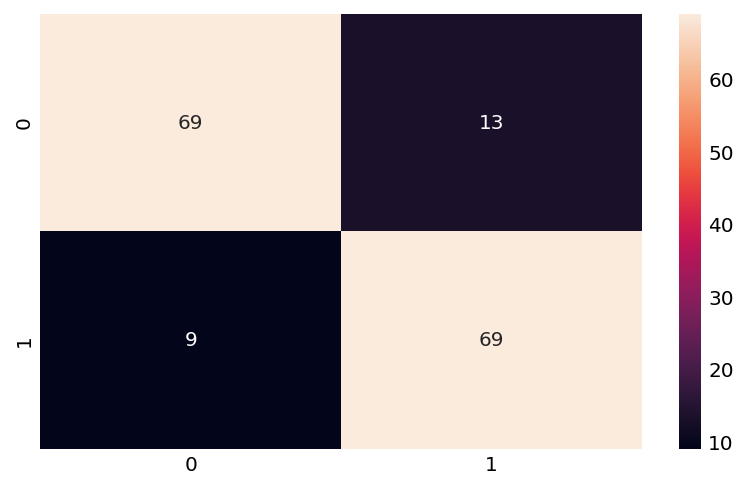

In [41]:
##Logistic Regression with all features
lg_model_unseen = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model_unseen.fit(X_unseen, y_unseen)
lg_model_score_unseen = cross_val_score(lg_model_unseen, X_unseen, y_unseen, cv=5)

print('accuracy_unseen = {:7.4f}'.format(lg_model_unseen.score(X_unseen, y_unseen)))
print('cross_val_score_unseen = {:7.4f}'.format(lg_model_score_unseen.mean()))

#Calculate the predicted labels and predicted probabilities on the unseen dataset
y_unseen_pred = lg_model_unseen.predict(X_unseen)

y_unseen_pp = lg_model_unseen.predict_proba(X_unseen)

#Create the confusion matrix
ac_unseen = accuracy_score(y_unseen, y_unseen_pred)
print('Accuracy score is: ', ac_unseen)
cm_unseen = confusion_matrix(y_unseen, y_unseen_pred)
sns.heatmap(cm_unseen, annot=True, fmt='d');
print(classification_report(y_unseen, y_unseen_pred))

accuracy_unseen_reduced =  0.8938
cross_val_score_unseen_reduced =  0.8750
Accuracy score is:  0.8625
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        82
           1       0.88      0.91      0.89        78

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160



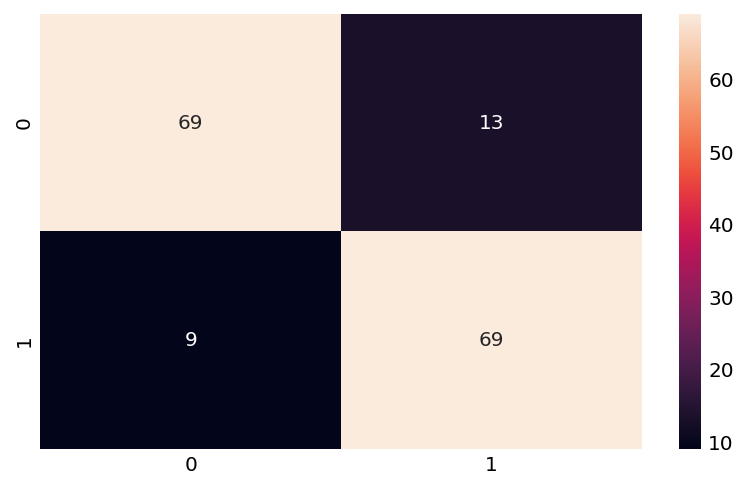

In [44]:
##Logistic Regression with reduced features
lg_model_unseen = LogisticRegression(solver='lbfgs', max_iter=1000)
lg_model_unseen.fit(X1_unseen, y1_unseen)
lg_model_score_unseen1 = cross_val_score(lg_model_unseen, X1_unseen, y1_unseen, cv=5)

print('accuracy_unseen_reduced = {:7.4f}'.format(lg_model_unseen.score(X1_unseen, y1_unseen)))
print('cross_val_score_unseen_reduced = {:7.4f}'.format(lg_model_score_unseen1.mean()))

#Calculate the predicted labels and predicted probabilities on the unseen dataset
y1_unseen_pred = lg_model_unseen.predict(X1_unseen)

y1_unseen_pp = lg_model_unseen.predict_proba(X1_unseen)

#Create the confusion matrix
ac_unseen1 = accuracy_score(y1_unseen, y1_unseen_pred)
print('Accuracy score is: ', ac_unseen)
cm_unseen1 = confusion_matrix(y1_unseen, y1_unseen_pred)
sns.heatmap(cm_unseen, annot=True, fmt='d');
print(classification_report(y1_unseen, y1_unseen_pred))

accuracy_unseen =  0.7000
cross_val_score_unseen =  0.6875
Accuracy score is:  0.7
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        82
           1       0.70      0.67      0.68        78

    accuracy                           0.70       160
   macro avg       0.70      0.70      0.70       160
weighted avg       0.70      0.70      0.70       160



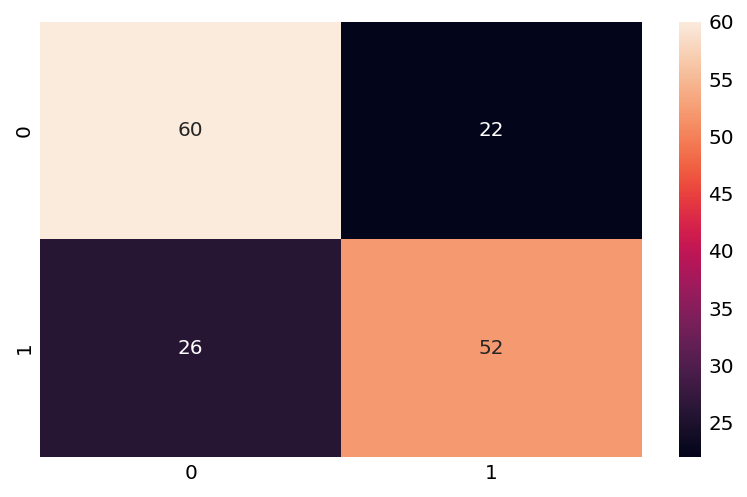

In [49]:
##Support Vector Machine with all features
svm_model_unseen = SVC(kernel='linear', probability=True, max_iter=1000)
svm_model_unseen.fit(X_unseen, y_unseen)
svm_model_score_unseen = cross_val_score(svm_model_unseen, X_unseen, y_unseen, cv=5)

print('accuracy_unseen = {:7.4f}'.format(svm_model_unseen.score(X_unseen, y_unseen)))
print('cross_val_score_unseen = {:7.4f}'.format(svm_model_score_unseen.mean()))

#Calculate the predicted labels and predicted probabilities on the unseen dataset
y_unseen_pred = svm_model_unseen.predict(X_unseen)

y_unseen_pp = svm_model_unseen.predict_proba(X_unseen)

#Create the confusion matrix
ac_unseen = accuracy_score(y_unseen, y_unseen_pred)
print('Accuracy score is: ', ac_unseen)
cm_unseen = confusion_matrix(y_unseen, y_unseen_pred)
sns.heatmap(cm_unseen, annot=True, fmt='d');
print(classification_report(y_unseen, y_unseen_pred))

accuracy_unseen =  0.7625
cross_val_score_unseen =  0.7250
Accuracy score is:  0.7
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        82
           1       0.88      0.91      0.89        78

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160



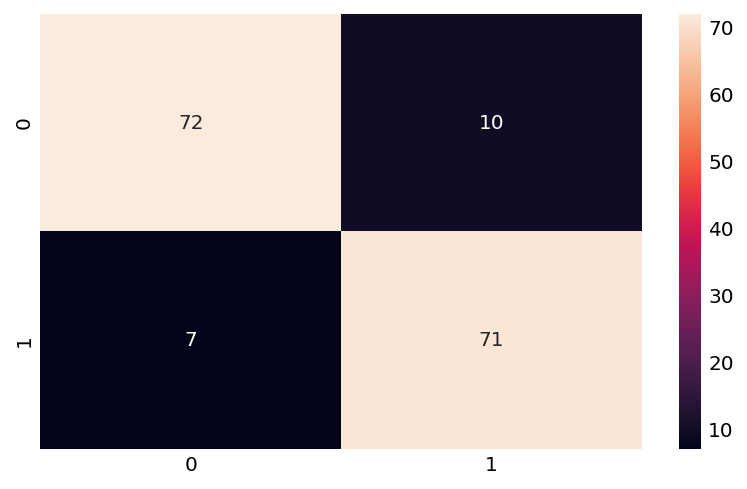

In [50]:
##Support Vector Machine with reduced features
svm_model_unseen = SVC(kernel='linear', probability=True, max_iter=1000)
svm_model_unseen.fit(X1_unseen, y1_unseen)
svm_model_score_unseen1 = cross_val_score(svm_model_unseen, X1_unseen, y1_unseen, cv=5)

print('accuracy_unseen = {:7.4f}'.format(svm_model_unseen.score(X1_unseen, y1_unseen)))
print('cross_val_score_unseen = {:7.4f}'.format(svm_model_score_unseen1.mean()))

#Calculate the predicted labels and predicted probabilities on the unseen dataset
y_unseen_pred = svm_model_unseen.predict(X1_unseen)

y_unseen_pp = svm_model_unseen.predict_proba(X1_unseen)

#Create the confusion matrix
ac_unseen1 = accuracy_score(y1_unseen, y1_unseen_pred)
print('Accuracy score is: ', ac_unseen)
cm_unseen = confusion_matrix(y1_unseen, y1_unseen_pred)
sns.heatmap(cm_unseen, annot=True, fmt='d');
print(classification_report(y1_unseen, y1_unseen_pred))

accuracy_unseen =  0.8375
cross_val_score_unseen =  0.8125
Accuracy score is:  0.8375
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.88      0.77      0.82        78

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



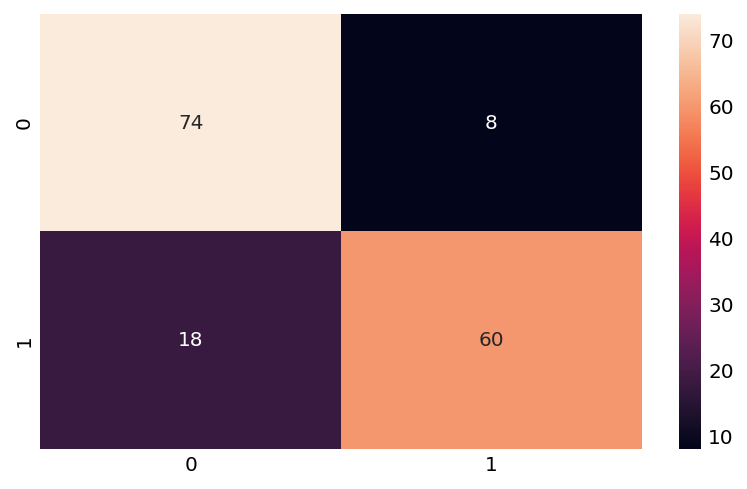

In [51]:
##Naive Bayes with all features
nb_model_unseen = GaussianNB()
nb_model_unseen.fit(X_unseen, y_unseen)
nb_model_score_unseen = cross_val_score(nb_model_unseen, X_unseen, y_unseen, cv=5)

print('accuracy_unseen = {:7.4f}'.format(nb_model_unseen.score(X_unseen, y_unseen)))
print('cross_val_score_unseen = {:7.4f}'.format(nb_model_score_unseen.mean()))

#Calculate the predicted labels and predicted probabilities on the unseen dataset
y_unseen_pred = nb_model_unseen.predict(X_unseen)

y_unseen_pp = nb_model_unseen.predict_proba(X_unseen)

#Create the confusion matrix
ac_unseen = accuracy_score(y_unseen, y_unseen_pred)
print('Accuracy score is: ', ac_unseen)
cm_unseen = confusion_matrix(y_unseen, y_unseen_pred)
sns.heatmap(cm_unseen, annot=True, fmt='d');
print(classification_report(y_unseen, y_unseen_pred))

accuracy_unseen =  0.8187
cross_val_score_unseen =  0.8125
Accuracy score is:  0.81875
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        82
           1       0.87      0.74      0.80        78

    accuracy                           0.82       160
   macro avg       0.83      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160



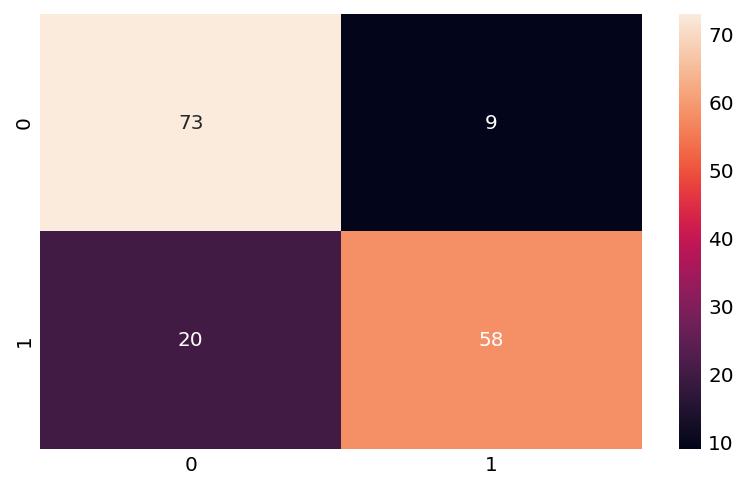

In [52]:
##Naive Bayes with reduced features
nb_model_unseen = GaussianNB()
nb_model_unseen.fit(X1_unseen, y1_unseen)
nb_model_score_unseen1 = cross_val_score(nb_model_unseen, X1_unseen, y1_unseen, cv=5)

print('accuracy_unseen = {:7.4f}'.format(nb_model_unseen.score(X1_unseen, y1_unseen)))
print('cross_val_score_unseen = {:7.4f}'.format(nb_model_score_unseen1.mean()))

#Calculate the predicted labels and predicted probabilities on the unseen dataset
y1_unseen_pred = nb_model_unseen.predict(X1_unseen)

y1_unseen_pp = nb_model_unseen.predict_proba(X1_unseen)

#Create the confusion matrix
ac_unseen = accuracy_score(y1_unseen, y1_unseen_pred)
print('Accuracy score is: ', ac_unseen)
cm_unseen = confusion_matrix(y1_unseen, y1_unseen_pred)
sns.heatmap(cm_unseen, annot=True, fmt='d');
print(classification_report(y1_unseen, y1_unseen_pred))

In [ ]:
#Gridsearch optimal parameters for all three models

In [ ]:
pl_map = {
    'N': 0,
    'Y': 1
}

['diagnosis'] = breast_cancer['diagnosis'].map(bm_map)

In [ ]:
yhat_pp_lg = lg_model.predict_proba(X1_unseen)
yhat_pp_svm = svm_model.predict_proba(X1_unseen)
yhat_pp_nb = nb_model.predict_proba(X1_unseen)
fpr, tpr, _ = roc_curve(y1_unseen, yhat_pp_lg[:,1], pos_label='M')
fpr_svm, tpr_svm, _ = roc_curve(y1_unseen, yhat_pp_svm[:,1], pos_label='M')
fpr_nb, tpr_nb, _ = roc_curve(y1_unseen, yhat_pp_nb[:,1], pos_label='M')

plt.figure(figsize=[10,10])

plt.plot(fpr, tpr, label='ROC curve Logistic (area = %0.2f)' % auc(fpr, tpr), linewidth=4)
plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC (area = %0.2f)' % auc(fpr_svc, tpr_svc), linewidth=4, color='darkred')
plt.plot(fpr_nb, tpr_nb, label='ROC curve NB (area = %0.2f)' % auc(fpr_nb, tpr_nb), linewidth=4, color='darkblue')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()